In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
dataset = pd.read_csv('tmdb_5000_movies.csv')
dataset

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
dataset.shape

(4803, 20)

In [ ]:
dataset.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
dataset.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
dataset.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [ ]:
dataset.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
dataset['homepage'].dtypes

dtype('O')

In [ ]:
dataset['overview'].dtypes

dtype('O')

In [ ]:
dataset['tagline'].dtypes

dtype('O')

In [ ]:
dataset['runtime'].dtypes

dtype('float64')

In [ ]:
dataset['release_date'].dtypes

dtype('O')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [ ]:
imputer = imputer.fit(dataset[['runtime']])
imputer

SimpleImputer()

In [ ]:
dataset[['runtime']] = imputer.transform(dataset[['runtime']])
dataset.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [ ]:
dataset = dataset.drop('vote_average', axis=1)
dataset

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,Newlyweds,0.642552,[],[],0,85.0,[],Released,Newlyweds,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",6
4801,0,[],126186,[],en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Shanghai Calling,7


In [ ]:
dataset.describe()

,budget,id,popularity,revenue,runtime,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607225,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,13752.000000


<Axes: >

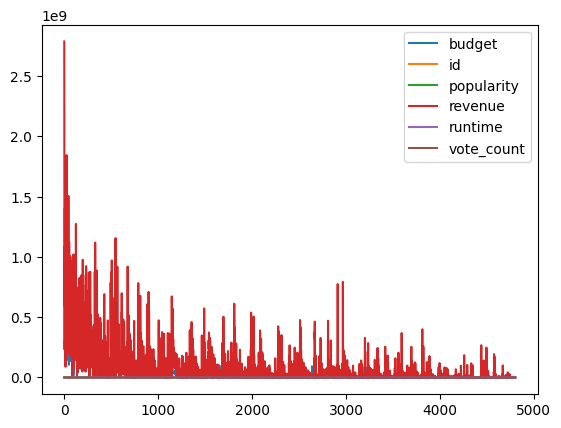

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

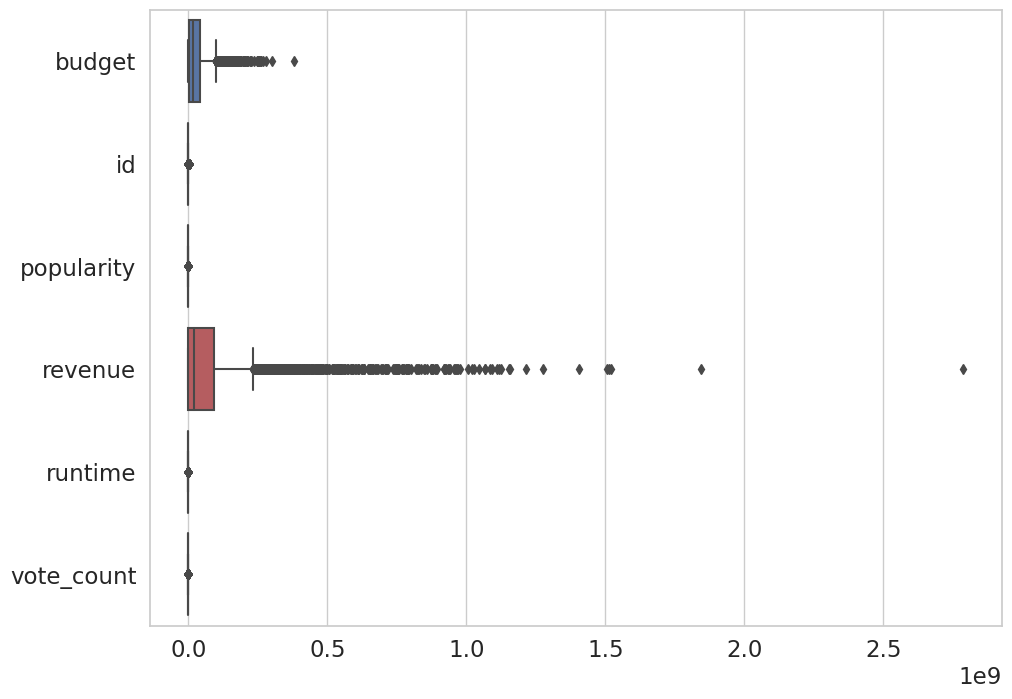

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

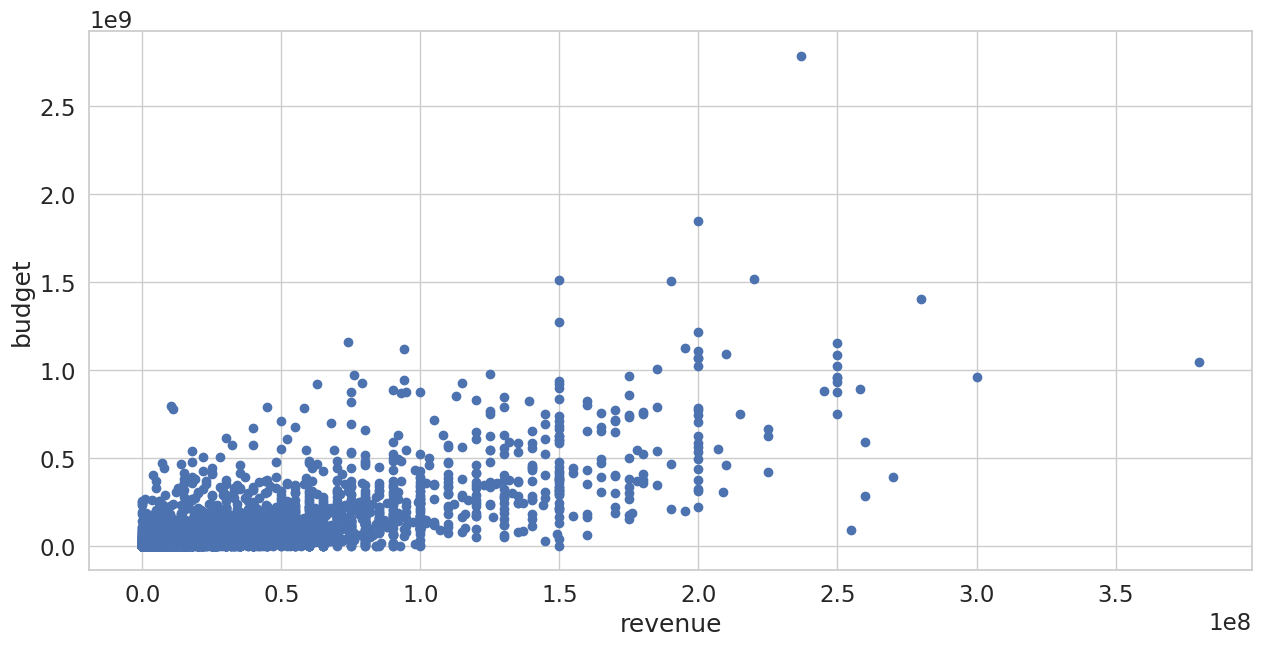

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['budget'], dataset['revenue'])
 
# x-axis label
ax.set_xlabel('revenue')
 
# y-axis label
ax.set_ylabel('budget')
plt.show()

In [ ]:
import sklearn

# IQR budget
Q1 = np.percentile(dataset['budget'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['budget'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (4482, 15)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['budget'] > upper].index
outliers_lower = dataset[dataset['budget'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (4482, 15)


In [ ]:
import sklearn

# IQR revenue
Q1 = np.percentile(dataset['revenue'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['revenue'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (4482, 15)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['revenue'] > upper].index
outliers_lower = dataset[dataset['revenue'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (3462, 15)


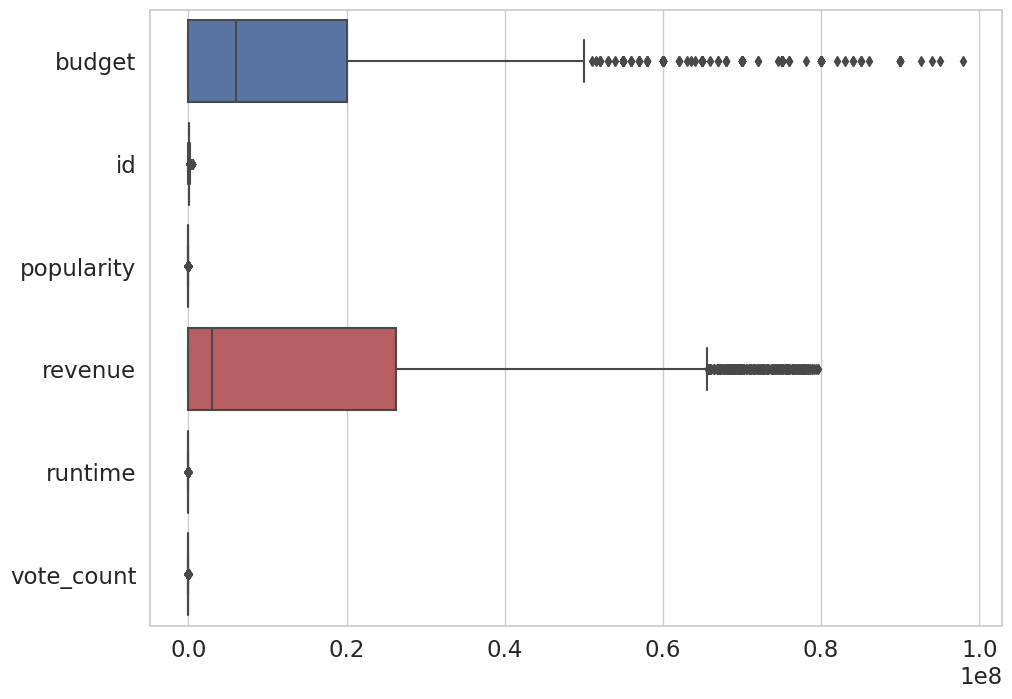

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

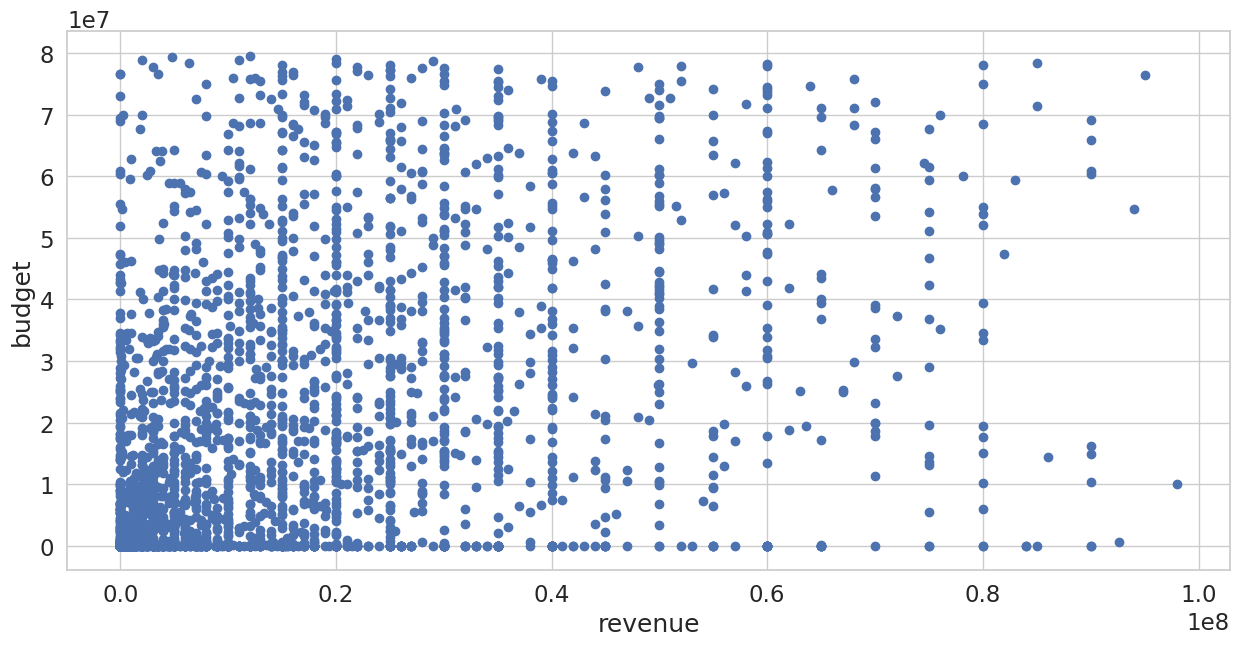

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['budget'], dataset['revenue'])
 
# x-axis label
ax.set_xlabel('revenue')
 
# y-axis label
ax.set_ylabel('budget')
plt.show()

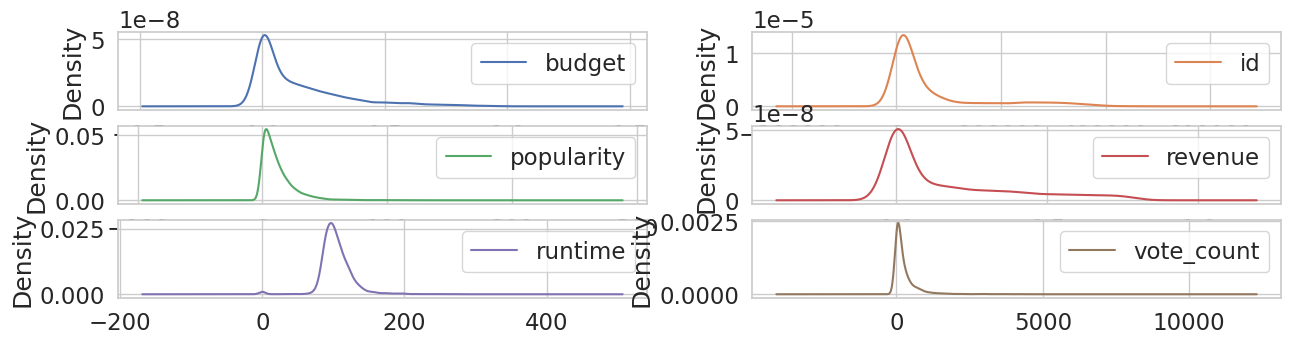

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

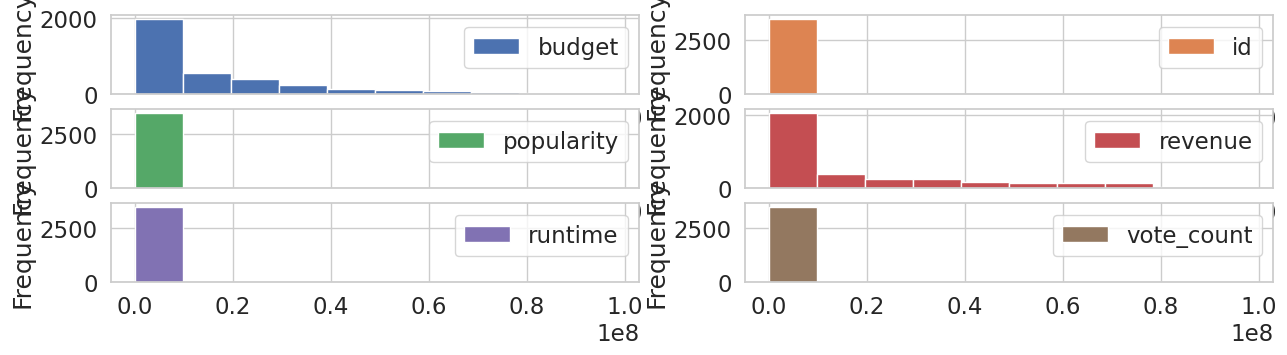

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

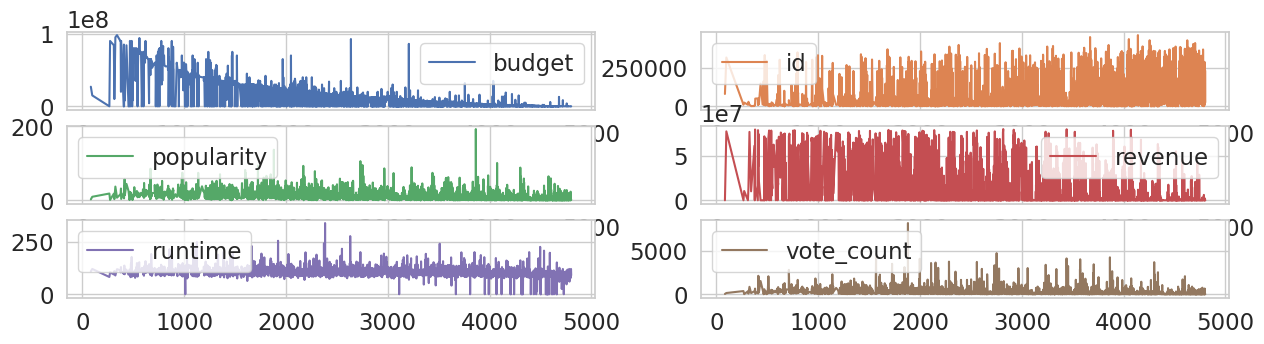

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

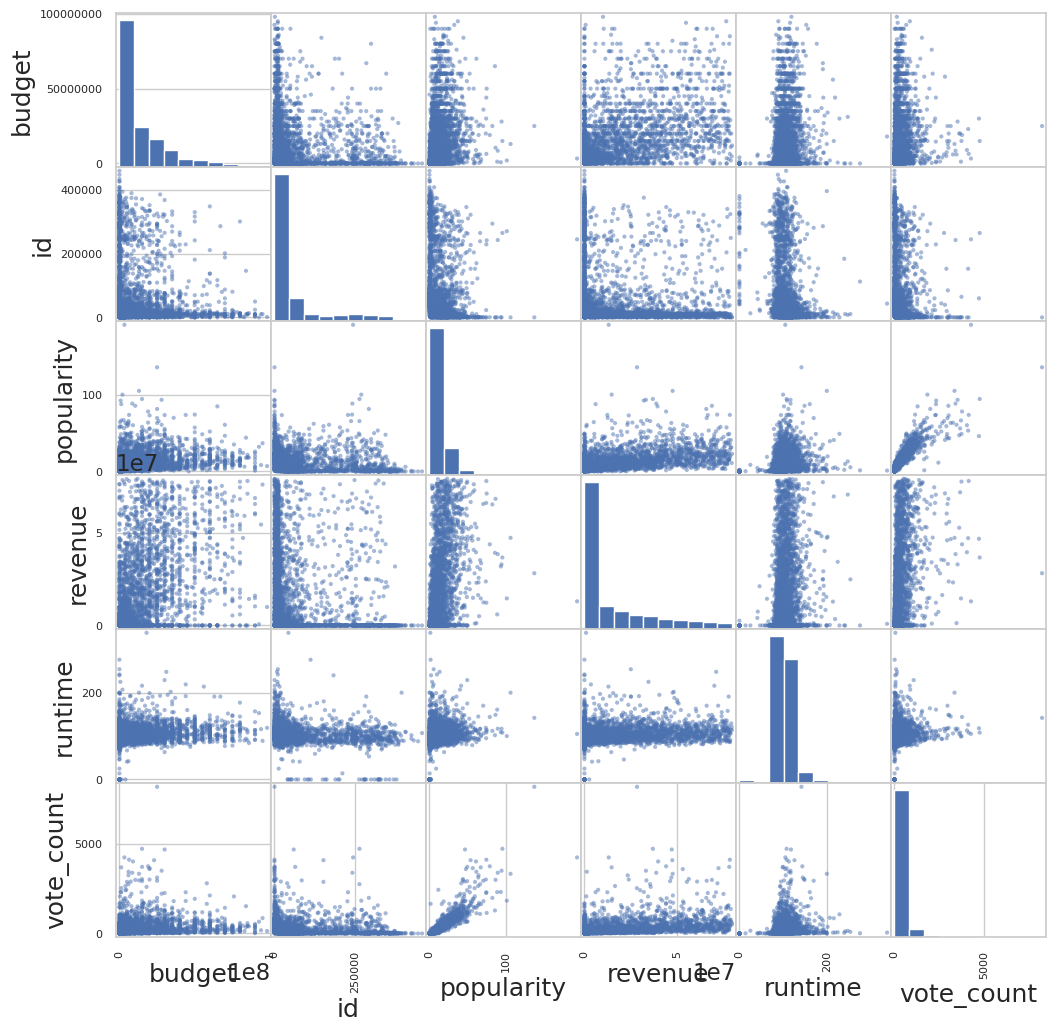

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

<ipython-input-62-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


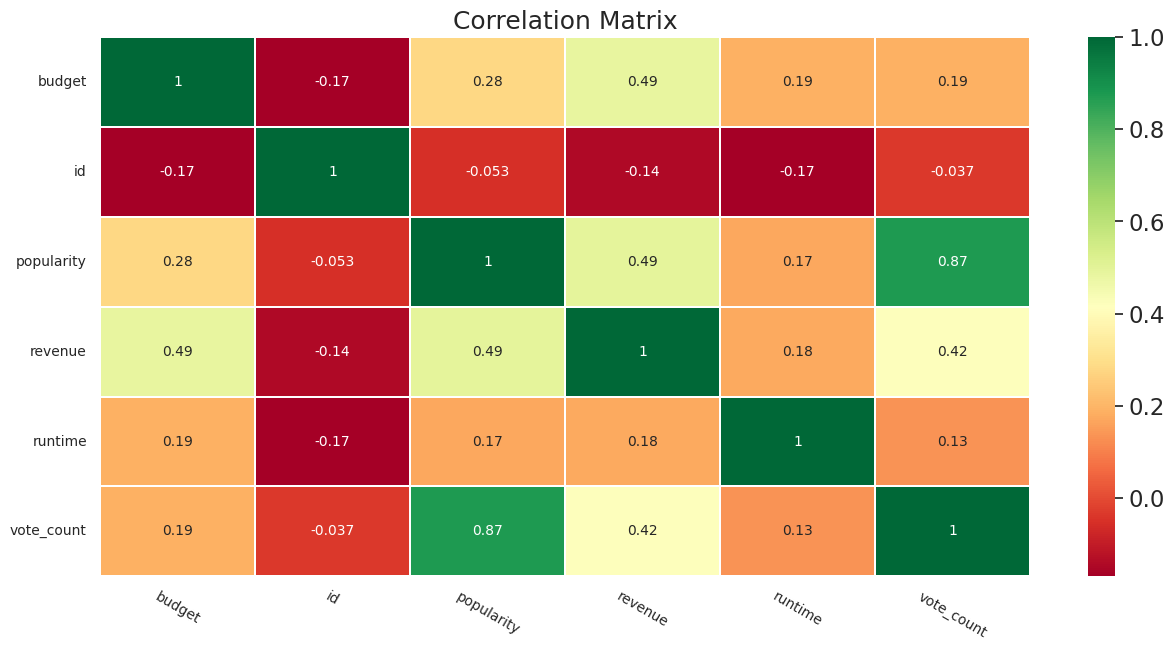

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x = dataset.drop('id', axis=1)
x

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",[],en,The Lovers,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Lovers,34
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Shin Godzilla,143
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...","[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cat in the Hat,366
272,90000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 2301, ""name"": ""architect""}, {""id"": 345...",en,Town & Country,1.004579,"[{""name"": ""New Line Cinema"", ""id"": 12}]",[],10372291,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Town & Country,16
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...","[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Son of the Mask,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],en,Newlyweds,0.642552,[],[],0,85.0,[],Released,Newlyweds,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",6
4801,0,[],[],en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Shanghai Calling,7


In [ ]:
y = dataset["id"]
y

83       79698
97      315011
265      10588
272      24113
309      10214
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: id, Length: 3462, dtype: int64

In [ ]:
y.values.reshape(-1,1)

array([[ 79698],
       [315011],
       [ 10588],
       ...,
       [231617],
       [126186],
       [ 25975]])

In [ ]:
x = pd.get_dummies(x)
x

,budget,popularity,revenue,runtime,vote_count,genres_[],"genres_[{""id"": 10402, ""name"": ""Music""}, {""id"": 10749, ""name"": ""Romance""}]","genres_[{""id"": 10402, ""name"": ""Music""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""name"": ""Animation""}, {""id"": 28, ""name"": ""Action""}, {""id"": 35, ""name"": ""Comedy""}]","genres_[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}]","genres_[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name"": ""Comedy""}]",...,title_Zombie Hunter,title_Zoolander,title_Zoolander 2,title_Zoom,title_Zulu,title_[REC],title_[REC]²,title_eXistenZ,title_xXx: State of the Union,title_Æon Flux
83,27000000,2.418535,0,109.0,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,15000000,9.476999,77000000,120.0,143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,0,18.251129,0,82.0,366,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,90000000,1.004579,10372291,104.0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,84000000,17.815595,0,94.0,338,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,238,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,9000,0.642552,0,85.0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,1.444476,0,120.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0.857008,0,98.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.shape

(3462, 14143)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,14133,14134,14135,14136,14137,14138,14139,14140,14141,14142
0,0.735861,-0.720135,-0.720950,0.229156,-0.499952,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
1,0.076305,-0.176365,2.848432,0.719166,-0.264734,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
2,-0.748142,0.499575,-0.720950,-0.973596,0.216490,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
3,4.198535,-0.829063,-0.240136,0.006424,-0.538795,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
4,3.868756,0.466022,-0.720950,-0.439040,0.156067,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,-0.736050,0.192861,-0.626342,-1.018142,-0.059728,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
3458,-0.747647,-0.856952,-0.720950,-0.839957,-0.562533,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
3459,-0.748142,-0.795174,-0.720950,0.719166,-0.560375,-0.090298,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998
3460,-0.748142,-0.840431,-0.720950,-0.260854,-0.558217,11.074424,-0.02945,-0.016998,-0.024042,-0.024042,...,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998,-0.016998


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,14133,14134,14135,14136,14137,14138,14139,14140,14141,14142
0,0.275510,0.012562,0.000000,0.322485,0.004144,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153061,0.049224,0.967730,0.355030,0.017428,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.094797,0.000000,0.242604,0.044607,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.918367,0.005218,0.130358,0.307692,0.001950,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.857143,0.092535,0.000000,0.278107,0.041194,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,0.002245,0.074118,0.025650,0.239645,0.029007,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3458,0.000092,0.003337,0.000000,0.251479,0.000609,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3459,0.000000,0.007503,0.000000,0.355030,0.000731,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3460,0.000000,0.004451,0.000000,0.289941,0.000853,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

ValueError: ignored

In [78]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

NameError: ignored